<a href="https://colab.research.google.com/github/DevTulioDantas/OTG_Case_Walmart/blob/main/Fase3_E_Commerce_Wallmart_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sidetable
!pip install ydata-profiling
!pip install pydantic-settings

from pydantic_settings import BaseSettings

from ydata_profiling import ProfileReport

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

import sidetable

import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

from IPython.core.display import HTML
from ipywidgets import interact, widgets
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv("walmart.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Verificando nulos

df.missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

df.missing.style.format('{:.2%}', subset='missing_pct')

<ipython-input-10-345bdee1cce0>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.missing = (


,missing_count,missing_pct
User_ID,0,0.00%
Product_ID,0,0.00%
Gender,0,0.00%
Age,0,0.00%
Occupation,0,0.00%
City_Category,0,0.00%
Stay_In_Current_City_Years,0,0.00%
Marital_Status,0,0.00%
Product_Category,0,0.00%
Purchase,0,0.00%


In [ ]:
df.shape

(550068, 10)

In [ ]:
#verificando linhas duplicadas

df.duplicated(keep=False).sum()

np.int64(0)

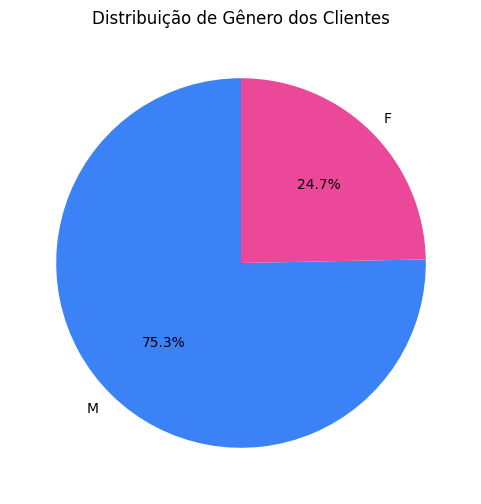

In [ ]:
#Analise de distribuição de genero

gender_counts = df["Gender"].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#3B82F6', '#EC4899'])
plt.title("Distribuição de Gênero dos Clientes")
plt.show()

Com base no gráfico "Distribuição de Gênero dos Clientes" do e-commerce wallmart, que mostra uma grande diferença entre as 2 catgorias, algumas estratégias de posicionamento podem ser consideradas:

  **Estrategia para vendas voltadas ao público masculino:**
**Foco em produtos para homens:** Priorize o estoque e a promoção de itens que atendam às preferências do público masculino, que representa a maioria.
**Campanhas segmentadas:** Invista em marketing direcionado para homens, usando canais e mensagens que ressoem com esse grupo.

  **Estrategia para o público feminino:**
**Atração de mulheres:** Desenvolva iniciativas para aumentar a participação feminina, como oferecer produtos específicos para mulheres ou campanhas inclusivas, visando equilibrar a base de clientes.
**Análise de comportamento:** Investigue por que a participação feminina é menor e ajuste a oferta ou experiência de compra para atender melhor a esse público.

In [ ]:
#Analise de distribuiçao por faixa de idade

# Função para mapear as faixas de idade (criado com auxilio de i.a)

def map_age_group(age):
    if age == "0-17":
        return "0-17"
    elif age == "18-25":
        return "18-30"
    elif age in ["26-35", "36-45"]:
        return "31-45"
    elif age in ["46-50", "51-55"]:
        return "46-60"
    elif age == "55+":
        return "61+"
    else:
        return "Desconhecido"

# Aplicando o mapeamento
df["Age_Group"] = df["Age"].apply(map_age_group)


age_distribution = df["Age_Group"].value_counts()

print(age_distribution)

Age_Group
31-45    329600
18-30     99660
46-60     84202
61+       21504
0-17      15102
Name: count, dtype: int64


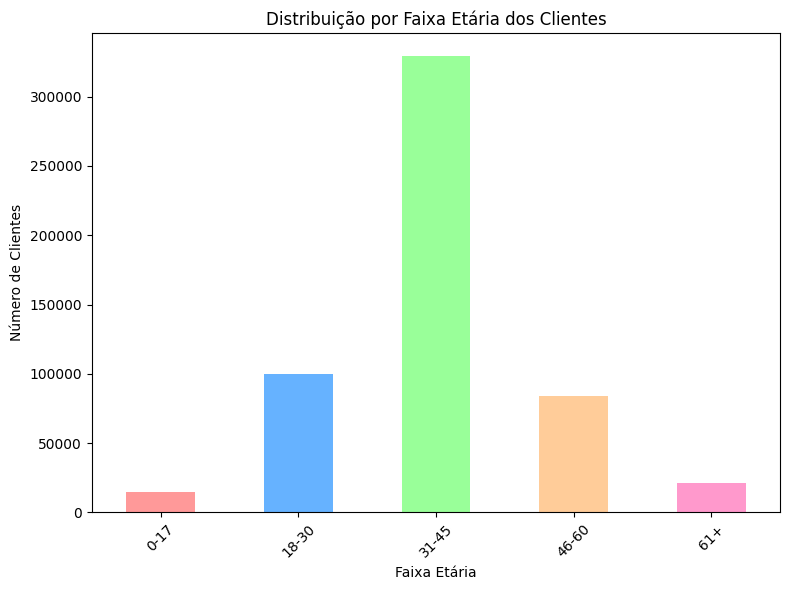

In [ ]:
age_distribution = df["Age_Group"].value_counts().reindex(["0-17", "18-30", "31-45", "46-60", "61+"])
plt.figure(figsize=(8, 6))
age_distribution.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'])
plt.title("Distribuição por Faixa Etária dos Clientes")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grafico de distribuição de clientes por faixa etária mostra uma forte concentração nos cliente de 31-45 anos. Podemos considerar os gurpos e 18-30 e 46-60 como grupos subaproveitados. São grupos que consomem muito pela internet e por isso são potenciais compradores dos produtos da Walmart.

Recomendo a Walmart fazer um estudo com dados da sua base de marketing para entender: Porque essas faixas estárias estão subaproveitadas?

**levantamento de hipoteses: **

**Preferências de mercado:** Produtos ou serviços podem estar mais alinhados aos interesses ou necessidades da faixa etária de 31-45 anos, como soluções para famílias jovens ou profissionais em ascensão.
**Possivel solução:** Considere uma solução a empresa aumentar a sua gama de produtos para o e-commerce

**Campanhas de marketing:** Estratégias de marketing podem estar mais focadas nesse grupo, alcançando-os de forma mais eficaz.
**Possivel Solução:** Campanhas em diferentes redes sociais com diferentes abordagens, tentando tocas em mais faixas etárias diferentes

**Demografia local**: A população na região pode ter uma concentração natural maior de pessoas entre 31-45 anos.
**Possivel solução**: Como essa hipotese é uma caracteristica  natural entendemos que esse resultado mostra uma abordagem eficiente em todas as faixas etárias replicando a distribuição da população onde a empresa opera.



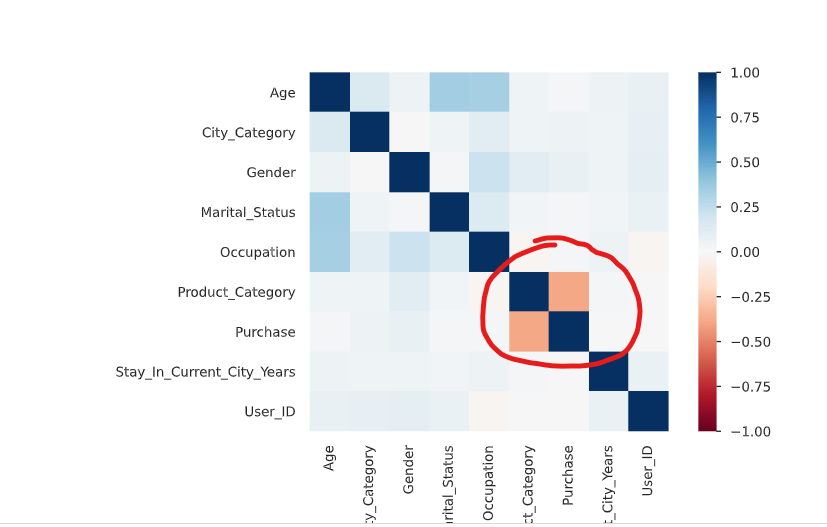  Nesse mapa de calor notamos um relação entre Product_Category e Purchase. vamos explorar mais essa relação


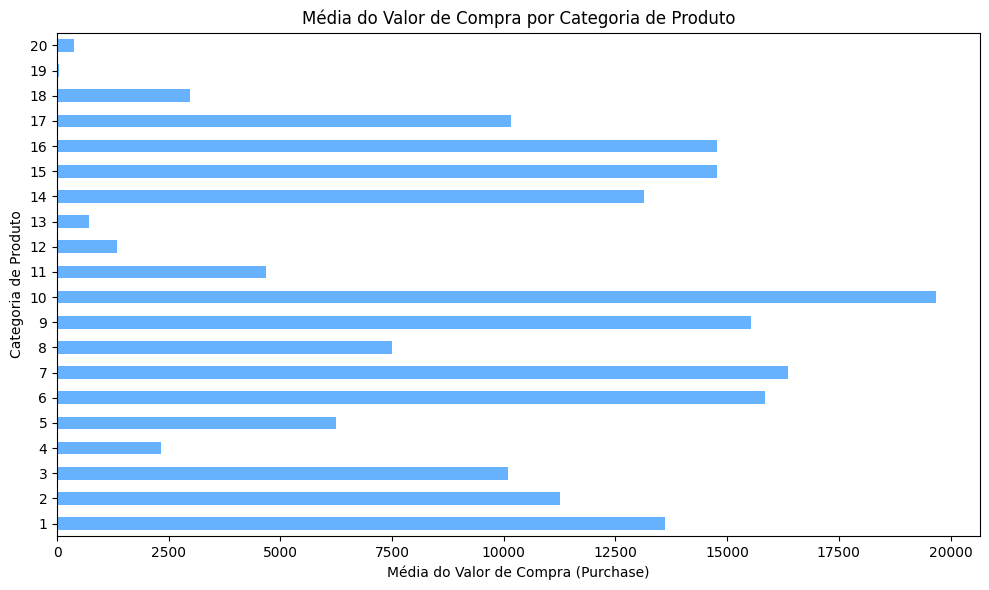

In [ ]:


avg_purchase_by_category = df.groupby("Product_Category")["Purchase"].mean()

# Convertendo Product_Category para numérico e ordenando em ordem crescente(metodo criado com auxilio de i.a)
avg_purchase_by_category.index = avg_purchase_by_category.index.astype(int)
avg_purchase_by_category = avg_purchase_by_category.sort_index()


plt.figure(figsize=(10, 6))
avg_purchase_by_category.plot(kind='barh', color='#66B2FF')
plt.title("Média do Valor de Compra por Categoria de Produto")
plt.xlabel("Média do Valor de Compra (Purchase)")
plt.ylabel("Categoria de Produto")
plt.tight_layout()
plt.show()

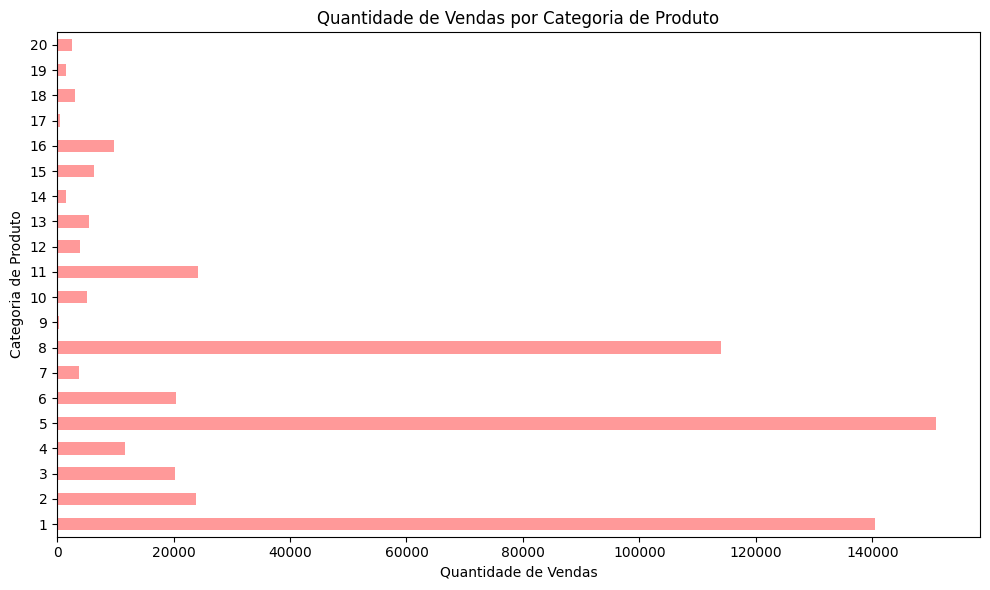

In [ ]:
#Criando um grafico de quantidade de vendas por categoria

category_sales = df["Product_Category"].value_counts()


category_sales.index = category_sales.index.astype(int)
category_sales = category_sales.sort_index()
category_sales.index = category_sales.index.astype(str) #convertendo string para melhor visualização no grafico


plt.figure(figsize=(10, 6))
category_sales.plot(kind='barh', color='#FF9999')
plt.title("Quantidade de Vendas por Categoria de Produto")
plt.xlabel("Quantidade de Vendas")
plt.ylabel("Categoria de Produto")
plt.tight_layout()
plt.show()

**Correlação negativa confirmada:** Como vimos no mapa de calor anterior (correlação de ~ -0,5 entre Product_Category e Purchase), categorias com números mais altos tendem a ter valores médios de compra menores (ex.: categorias 12, 13, 19), enquanto categorias mais baixas (ex.: 1) têm valores maiores.

**Qual posição a empresa deve tomar ?**

As categorias 12,13 e 19 devem ser repensadas se vale continuar no portifolio da empresa. Para uma analise mais precisa seria importante conhecer a margem de lucro dessas mesmas porem independente de uma margem elevada como o valor total medio das compras são consideravelmente baixos e o volume total também, mesmo com uma margem elevada o resultado liquido final é irrelevante ao montante total de vendas da empresa.

Caso essas categorias a empresa julgue como lucrativas e tenha interesse em continuar com ela no eu portifólio vale pensar em uma campanha de marketing focada nesses produtos, elevar a quantidade de vendas e virar um player significativo no segmento.

**Categoria 1 - O Princial Business**

Os Graficos mostram que a categoria numero 1 é o principal Business do Wallmart.

**Qual posição a empresa deve tomar?**

  Reforçar a Posição de Liderança:
Priorizar Estoque
Marketing Focado
Programas de Fidelidade, foco em manter os clientes dessa posição ativos

  **Aumentar o Ticket Médio**
Upselling e Cross-Selling: Como a média de compra já é alta, sugira produtos complementares ou acessórios relacionados à Categoria 1. Por exemplo, se a Categoria 1 inclui eletrônicos como laptops, ofereça capas, mouses ou serviços de garantia estendida.

Pacotes Promocionais: Crie bundles com outros produtos (ex.: da Categoria 5 ou 8, que também são populares) para aumentar o valor por compra. Exemplo: "Compre um produto da Categoria 1 e leve um da Categoria 5 com 10% de desconto"

A posição a tomar é fortalecer e expandir a dominância da Categoria 1, priorizando estoque, marketing e estratégias para aumentar o ticket médio, enquanto se protege contra riscos e aproveita oportunidades sazonais e de segmentação.

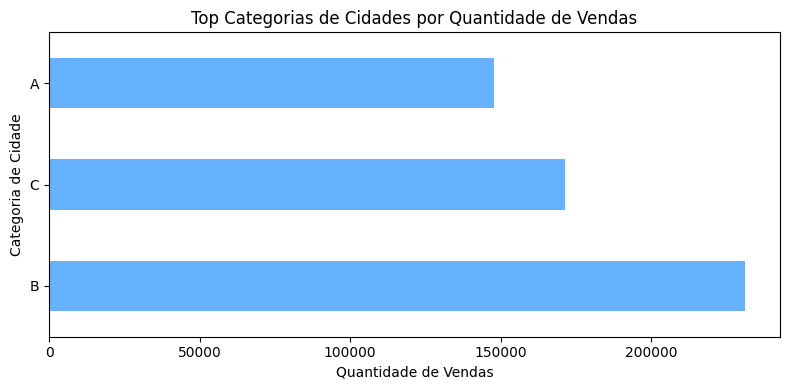

In [ ]:
#Agora vamos a uma analise por categoria de  cidades


city_sales = df["City_Category"].value_counts().sort_values(ascending=False)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 4))
city_sales.plot(kind='barh', color='#66B2FF')
plt.title("Top Categorias de Cidades por Quantidade de Vendas")
plt.xlabel("Quantidade de Vendas")
plt.ylabel("Categoria de Cidade")
plt.tight_layout()
plt.show()

Falta informações sobre como foi categorizado as cidades mas vamos levar em consideração que as cidades B são cidades medias.

Porque cidades B é a maior quantidade de vendas ?

Considero que uma grande possibilidade do sucesso nas cidades B é pelo motivo de serem cidades que o comercio tem menos concorrencias que em cidades grandes e tem uma populção absoluta relevante. Percebo que esse cenario favorece um Big Player como o Wallmart que tem uma gama grande de produtos e preços competitivos dando boa vantagem ao comercio que tem nas cidades médias.

Para continuar com exito em cidades médias recomendo uma analise de como melhorar a infraestrura/sistemas de entrega a esses locais. Cidades medias podem ser afastadas de grande centro e por isso pode ter um acesso mais dificil. Melhorar esse serviço deve resultar em mais exito nas vendas a pequenas e médias cidades.

Consideraçõs Finais